In [1]:
import os
import sys
import pdb
import numpy as np
import scipy.interpolate
import scipy.io
import matlab.engine
import importlib
import soundfile as sf
import multiprocessing
import functools

import matplotlib.pyplot as plt

import port
importlib.reload(port)

import room_simulator
importlib.reload(room_simulator)

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures
import util_stimuli
import util_misc


In [2]:
eng = matlab.engine.start_matlab();


In [ ]:
# fn = '/scratch2/weka/mcdermott/francl/Room_Simulator_20181115_Rebuild/Expanded_HRIRdist140-5deg_elev_az_room3x3y4z_materials23wall23floor26ciel/15elev_35az_1.40x1.60y2.00z_l.wav'
# room_materials = [23, 23, 23, 23, 23, 26]
# room_dim_xyz = [3, 3, 4]
# head_pos_xyz = [1.4, 1.6, 2.0]
# head_azim = 0
# src_azim = 35
# src_elev = 15
# src_dist = 1.4

fn = '/scratch2/weka/mcdermott/francl/Room_Simulator_20181115_Rebuild/Expanded_HRIRdist140-5deg_elev_az_room5x4y2z_materials1wall15floor16ciel/0elev_45az_3.60x1.40y2.00z_l.wav'
room_materials = [1, 1, 1, 1, 15, 16]
room_dim_xyz = [5, 4, 2]
head_pos_xyz = [3.6, 1.4, 2.0]
head_azim = 0
src_azim = 45
src_elev = 0
src_dist = 1.4

buffer = 0
sr = 44100
dur = 0.5
use_hrtf_symmetry = True
use_jitter = False
incorporate_lead_zeros = False

print(fn)
y_l, hrtf_sr = sf.read(fn)
y_r, hrtf_sr = sf.read(fn.replace('_l.wav', '_r.wav'))
brir_francl = np.stack([y_l, y_r], axis=1)
print(brir_francl.shape, hrtf_sr, sr)


In [ ]:
importlib.reload(room_simulator)

brir_matlab = room_simulator.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    buffer=buffer,
    sr=sr,
    dur=dur,
    use_jitter=use_jitter,
    use_hrtf_symmetry=use_hrtf_symmetry,
    incorporate_lead_zeros=incorporate_lead_zeros,
    verbose=True,
    eng=eng)


In [ ]:
importlib.reload(port)

brir_msaddler = port.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    buffer=buffer,
    sr=sr,
    dur=dur,
    use_jitter=use_jitter,
    use_hrtf_symmetry=use_hrtf_symmetry,
    incorporate_lead_zeros=incorporate_lead_zeros)


In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=3, ncols=1)
ax[0].plot(brir_msaddler[:, 0], 'b')
ax[0].plot(brir_msaddler[:, 1], 'r')
ax[0].plot(brir_francl[:, 0], 'c', ls=':')
ax[0].plot(brir_francl[:, 1], 'm', ls=':')

ax[1].plot(brir_matlab[:, 0], 'b')
ax[1].plot(brir_matlab[:, 1], 'r')
ax[1].plot(brir_francl[:, 0], 'c', ls=':')
ax[1].plot(brir_francl[:, 1], 'm', ls=':')

ax[2].plot(brir_msaddler[:, 0] - brir_francl[:, 0], 'b')
ax[2].plot(brir_msaddler[:, 1] - brir_francl[:, 1], 'r')
ax[2].plot(brir_matlab[:, 0] - brir_francl[:, 0], 'c', ls=':')
ax[2].plot(brir_matlab[:, 1] - brir_francl[:, 1], 'm', ls=':')

for ax_ in ax:
    util_figures.format_axes(
        ax_,
        xlimits=[0, 500]
    )
plt.show()


In [ ]:
room_materials = [1, 1, 1, 1, 15, 16]
room_dim_xyz = [15, 14, 2]
head_pos_xyz = [3.6, 1.4, 2.0]
head_azim = 135
src_azim = 45
src_elev = 0
src_dist = 1.4

buffer = 0
sr = 44100
dur = 0.5
use_hrtf_symmetry = True
use_jitter = False
incorporate_lead_zeros = False

importlib.reload(port)

brir_msaddler = port.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    buffer=buffer,
    sr=sr,
    dur=dur,
    use_hrtf_symmetry=use_hrtf_symmetry,
    use_jitter=use_jitter,
    incorporate_lead_zeros=incorporate_lead_zeros)


In [ ]:
importlib.reload(room_simulator)

brir_matlab = room_simulator.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    buffer=buffer,
    sr=sr,
    dur=dur,
    use_jitter=use_jitter,
    use_hrtf_symmetry=use_hrtf_symmetry,
    incorporate_lead_zeros=incorporate_lead_zeros,
    verbose=True,
    eng=eng)


In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=2, ncols=1)

offset_brir_msaddler = brir_msaddler[1:]
offset_brir_matlab = brir_matlab[:-1]

ax[0].plot(offset_brir_msaddler[:, 0], 'b')
ax[0].plot(offset_brir_msaddler[:, 1], 'r')
ax[0].plot(offset_brir_matlab[:, 0], 'c', ls=':')
ax[0].plot(offset_brir_matlab[:, 1], 'm', ls=':')

ax[1].plot(offset_brir_msaddler[:, 0] - offset_brir_matlab[:, 0], 'b')
ax[1].plot(offset_brir_msaddler[:, 1] - offset_brir_matlab[:, 1], 'r')

for ax_ in ax:
    util_figures.format_axes(
        ax_,
        xlimits=[0, 800],
#         ylimits=[-0.01, 0.01]
    )
plt.show()


In [65]:
"""
DEBUG ISSUE OF SYMMETRY
"""
room_materials = [1, 1, 1, 1, 15, 16]
room_dim_xyz = [7, 8, 4]
head_pos_xyz = [3.6, 1.4, 2.0]
head_azim = -49
src_azim = 145
src_elev = 20
src_dist = 1.4
buffer = 0.5

c = 344.5
buffer = 0
sr = 44100
dur = 0.5
use_hrtf_symmetry = True
use_highpass = True
use_jitter = False
incorporate_lead_zeros = False
use_log_distance = True
hrtf_locs = None
hrtf_firs = None
importlib.reload(port)

np.random.seed(0)
brir_msaddler = port.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    buffer=buffer,
    sr=sr,
    c=c,
    dur=dur,
    hrtf_locs=hrtf_locs,
    hrtf_firs=hrtf_firs,
    use_hrtf_symmetry=use_hrtf_symmetry,
    use_log_distance=use_log_distance,
    use_jitter=use_jitter,
    use_highpass=use_highpass,
    incorporate_lead_zeros=incorporate_lead_zeros,
    processes=12,
    strict=True,
    verbose=True)


Loaded KEMAR HRTFs (Gardner & Martin, 1995 JASA): (368, 128, 2)
[get_brir] head_pos: [3.6, 1.4, 2.0], src_pos: [3.462485524167413, 2.7083628408026144, 2.4788282006559363], room_dim: [7, 8, 4]
[get_brir] time elapsed: 6.010967969894409 seconds


In [66]:
np.random.seed(0)
brir_matlab = room_simulator.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    buffer=buffer,
    sr=sr,
    c=c,
    dur=dur,
    use_hrtf_symmetry=use_hrtf_symmetry,
    use_log_distance=use_log_distance,
    use_jitter=use_jitter,
    use_highpass=use_highpass,
    incorporate_lead_zeros=incorporate_lead_zeros,
    eng=eng)


[room simulator] head_pos: [3.6, 1.4, 2.0], src_pos: [3.462485524167413, 2.7083628408026144, 2.4788282006559363], room_dim: [7, 8, 4]
[room simulator] time elapsed: 8.048342227935791 seconds


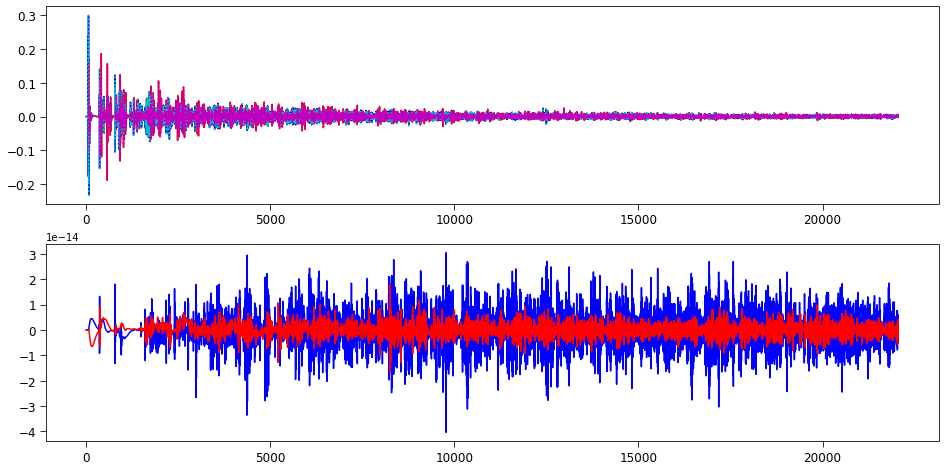

In [67]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=2, ncols=1)

offset_brir_msaddler = brir_msaddler[1:]
offset_brir_matlab = brir_matlab[:-1]

ax[0].plot(offset_brir_msaddler[:, 0], 'b')
ax[0].plot(offset_brir_msaddler[:, 1], 'r')
ax[0].plot(offset_brir_matlab[:, 0], 'c', ls=':')
ax[0].plot(offset_brir_matlab[:, 1], 'm', ls=':')

ax[1].plot(offset_brir_msaddler[:, 0] - offset_brir_matlab[:, 0], 'b')
ax[1].plot(offset_brir_msaddler[:, 1] - offset_brir_matlab[:, 1], 'r')

for ax_ in ax:
    util_figures.format_axes(
        ax_,
#         xlimits=[0, 8000],
#         ylimits=[-0.01, 0.01]
    )
plt.show()


In [ ]:
# import cProfile
# import pstats
# importlib.reload(port)

# func_to_profile = lambda : port.get_brir(
#     room_materials=[23, 23, 23, 23, 23, 26],
#     room_dim_xyz=[3, 3, 4],
#     head_pos_xyz=[1.4, 1.6, 2.0],
#     head_azim=0,
#     src_azim=35,
#     src_elev=15,
#     src_dist=1.4,
#     sr=44100,
#     dur=0.5,
#     use_jitter=False,
#     use_hrtf_symmetry=True,
#     incorporate_lead_zeros=False)

# cProfile.run('func_to_profile()', 'profiler_stats')

# p = pstats.Stats('profiler_stats')
# p.strip_dirs().sort_stats('cumulative').print_stats()


In [ ]:
hrtf_locs = scipy.io.loadmat('HRTFs/data_locs.mat')['locs_gardnermartin']
hrtf_locs = np.array(hrtf_locs, dtype=float)
hrtf_locs

fig, ax = plt.subplots()
x = hrtf_locs[:, 1]
y = hrtf_locs[:, 2]
ax.plot(x, y, 'k.')
plt.show()
